In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
import missingno as mns
import nltk
from wordcloud import WordCloud ,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
nltk.download('stopwords')
stop_words=stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [21]:
tweetdf=pd.read_csv('Tweets.csv')
tweetdf.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<Axes: >

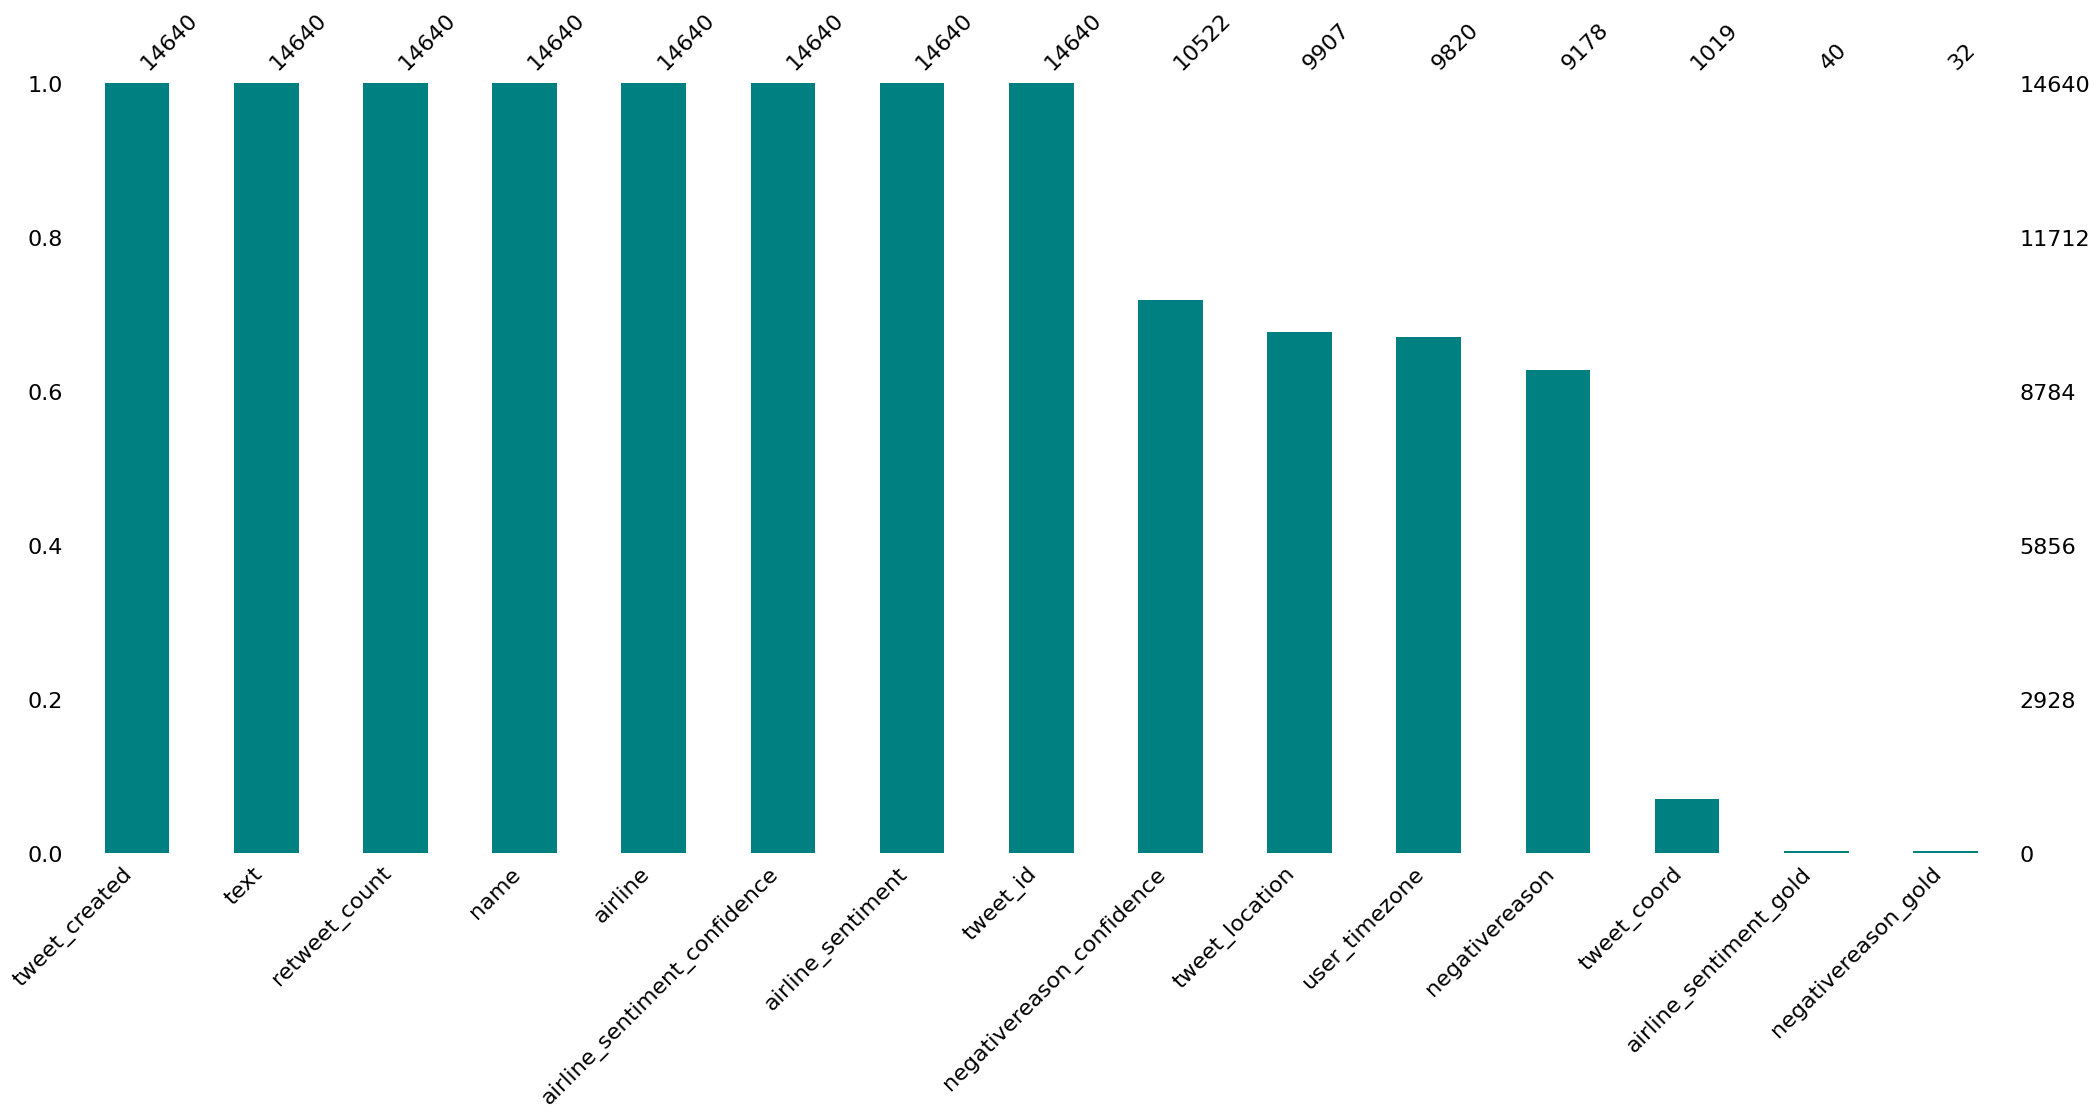

In [22]:
mns.bar(tweetdf,color='teal',sort='descending')

In [23]:
fig=px.histogram(x=tweetdf['airline'],text_auto=True,color=tweetdf['negativereason'])
fig.show()

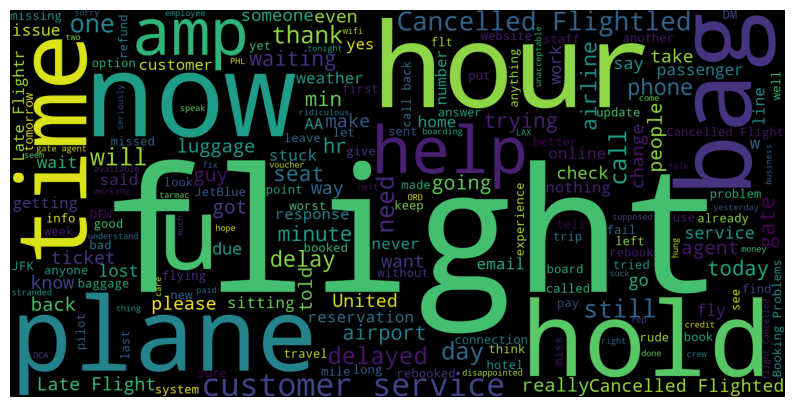

In [24]:
newdata=tweetdf[tweetdf['airline_sentiment'] =='negative']
words=" ".join(newdata['text'])
cleanword=" ".join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word != 'RT'])
word_cloud=WordCloud(stopwords=STOPWORDS, background_color='black',width=2000,height=1000).generate(cleanword)
plt.figure(1,figsize=(10,10))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

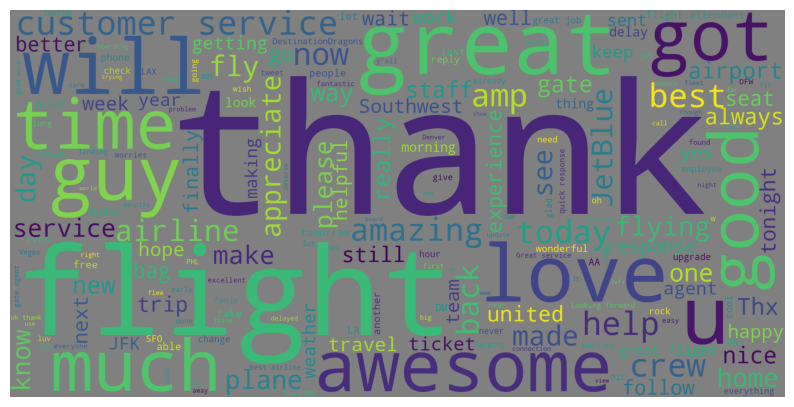

In [25]:
newdata2=tweetdf[tweetdf['airline_sentiment'] =='positive']
words2=" ".join(newdata2['text'])
cleanword2=" ".join([word for word in words2.split() if 'http' not in word and not word.startswith('@') and word != 'RT'])
word_cloud2=WordCloud(stopwords=STOPWORDS, background_color='grey',width=2000,height=1000).generate(cleanword2)
plt.figure(1,figsize=(10,10))
plt.imshow(word_cloud2)
plt.axis('off')
plt.show()

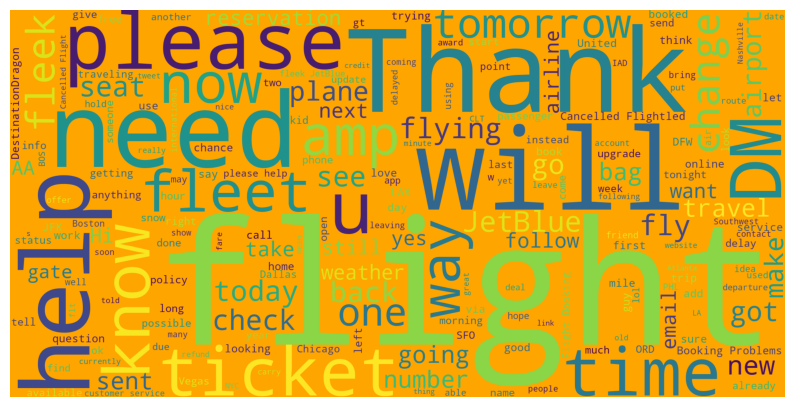

In [26]:
newdata2=tweetdf[tweetdf['airline_sentiment'] =='neutral']
words2=" ".join(newdata2['text'])
cleanword2=" ".join([word for word in words2.split() if 'http' not in word and not word.startswith('@') and word != 'RT'])
word_cloud2=WordCloud(stopwords=STOPWORDS, background_color='orange',width=2000,height=1000).generate(cleanword2)
plt.figure(1,figsize=(10,10))
plt.imshow(word_cloud2)
plt.axis('off')
plt.show()

In [27]:
from sklearn.utils import resample
tweetdf_neg=tweetdf[tweetdf['airline_sentiment']=='negative']
tweetdf_pos=tweetdf[tweetdf['airline_sentiment']=='positive']
tweetdf_neu=tweetdf[tweetdf['airline_sentiment']=='neutral']
tweetdf_nue_sam=resample(tweetdf_neu,n_samples=9178)
tweetdf_pos_sample=resample(tweetdf_pos,n_samples=9178)
tweetdf=pd.concat([tweetdf_neg,tweetdf_nue_sam,tweetdf_pos_sample],ignore_index=True)
tweetdf=tweetdf.sample(frac=1)
tweetdf['airline_sentiment'].value_counts()


airline_sentiment
negative    9178
positive    9178
neutral     9178
Name: count, dtype: int64

In [28]:
text_cleaning_re="@\S+f|https?:\s+https?:\s|[^A-Za-z0-9]+"
def preprocess(x,stem=False):
    x=re.sub(text_cleaning_re," ",str(x).lower()).strip()
    tokens=[]
    for token in x.split():
        if token not in stop_words:
            if stem:
                tokens.append(SnowballStemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)
tweetdf['text']= tweetdf['text'].apply(lambda x:preprocess(x))

<>:1: SyntaxWarning:

invalid escape sequence '\S'

<>:1: SyntaxWarning:

invalid escape sequence '\S'

C:\Users\USER\AppData\Local\Temp\ipykernel_8744\495109041.py:1: SyntaxWarning:

invalid escape sequence '\S'



In [29]:
x=tweetdf['text']
y=tweetdf['airline_sentiment']
xtrain,xtext,ytrain,ytext=train_test_split(x,y,test_size=0.2,random_state=1)
from sklearn.pipeline import Pipeline
clf1=Pipeline([('vectorize',CountVectorizer()),('transformer',TfidfTransformer()),('model',MultinomialNB())])
clf2=Pipeline([('vectorize',CountVectorizer()),('transformer',TfidfTransformer()),('model',BernoulliNB())])
clf3=Pipeline([('vectorize',CountVectorizer()),('transformer',TfidfTransformer()),('model',MLPClassifier(hidden_layer_sizes=(10,10)))])


In [30]:
clf1.fit(xtrain,ytrain)

Pipeline(steps=[('vectorize', CountVectorizer()),
                ('transformer', TfidfTransformer()),
                ('model', MultinomialNB())])

In [31]:
pred1=clf1.predict(xtext)
print(classification_report(ytext,pred1))
#fix class balancing

              precision    recall  f1-score   support

    negative       0.82      0.83      0.82      1839
     neutral       0.85      0.78      0.81      1841
    positive       0.86      0.91      0.88      1827

    accuracy                           0.84      5507
   macro avg       0.84      0.84      0.84      5507
weighted avg       0.84      0.84      0.84      5507



In [32]:
clf2.fit(xtrain,ytrain)

Pipeline(steps=[('vectorize', CountVectorizer()),
                ('transformer', TfidfTransformer()), ('model', BernoulliNB())])

In [33]:
pred2=clf1.predict(xtext)
print(classification_report(ytext,pred2))

              precision    recall  f1-score   support

    negative       0.82      0.83      0.82      1839
     neutral       0.85      0.78      0.81      1841
    positive       0.86      0.91      0.88      1827

    accuracy                           0.84      5507
   macro avg       0.84      0.84      0.84      5507
weighted avg       0.84      0.84      0.84      5507



In [34]:
clf3.fit(xtrain,ytrain)

Pipeline(steps=[('vectorize', CountVectorizer()),
                ('transformer', TfidfTransformer()),
                ('model', MLPClassifier(hidden_layer_sizes=(10, 10)))])

In [35]:
pred3=clf3.predict(xtext)
print(classification_report(ytext,pred3))

              precision    recall  f1-score   support

    negative       0.96      0.80      0.87      1839
     neutral       0.86      0.96      0.90      1841
    positive       0.93      0.97      0.95      1827

    accuracy                           0.91      5507
   macro avg       0.92      0.91      0.91      5507
weighted avg       0.92      0.91      0.91      5507



In [36]:
##reasearch how to tweek 'grid search' do a hyper parameter turning

In [ ]:
from sklearn.model_selection import GridSearchCV
pram_grid1={
    'vectorize__max_df':[0.75,1.0],
    'vectorize__min_df':[1,3],
    'transformer__use_idf':[True,False],
    'model__alpha':[0.1,1.0]

}



pram_grid2={
    'vectorize__max_df':[0.75,1.0],
    'vectorize__min_df':[1,3],
    'transformer__use_idf':[True,False],
    'model__alpha':[0.1,1.0]

}

pram_grid3={
    'vectorize__max_df':[0.75,1.0],
    'vectorize__min_df':[1,3],
    'transformer__use_idf':[True,False],
    'model__hidden_layer_sizes':[(10,10),(20,20)],
    'model__activation':['relu','identity','logistics','tanh'],
    'model__solver':['lbfgs','sgd','adam']
}

pipelines=[clf1,clf2,clf3]
pram_grids=[pram_grid1,pram_grid2,pram_grid3]
best_estimators=[]
for i,(pipelines,pram_grids) in enumerate(zip(pipelines,pram_grids)):
    grid_search=GridSearchCV(pipelines,pram_grids,cv=5,scoring='accuracy',n_jobs=-1)
    grid_search.fit(xtrain,ytrain)
    print(f'Best paramteters for clf{i+1}: {grid_search.best_params_}')
    print(f'Best cross validation score  for clf{i+1}: {grid_search.best_score_}')
    best_estimators.append(grid_search.best_estimator_)






Best paramteters for clf1: {'model__alpha': 0.1, 'transformer__use_idf': True, 'vectorize__max_df': 0.75, 'vectorize__min_df': 1}
Best cross validation score  for clf1: 0.8486406164743876
Best paramteters for clf2: {'model__alpha': 0.1, 'transformer__use_idf': True, 'vectorize__max_df': 0.75, 'vectorize__min_df': 1}
Best cross validation score  for clf2: 0.8445546290967378
